In [1]:
import numpy as np

In [2]:
class linear_regression():
    def __init__(self, learning_rate, no_of_iteration):
        #initiating learning rate and no. of iteration
        self.learning_rate = learning_rate
        self.no_of_iteration = no_of_iteration

    def fit(self, x, y):
        #no. of training example and no. of features
        self.m, self.n = x.shape     #rows and column

        #initating weight and bias
        self.w = np.zeros(self.n)
        self.b = 0
        self.x = x
        self.y = y

        #implementing gradient descent
        for i in range(self.no_of_iteration):
            self.update_weights()

    def update_weights(self):
        y_prediction = self.predict(self.x)

        #calculating gradient 
        dw = -(2 * (self.x.T).dot(self.y - y_prediction))/self.m
        db = -2 * np.sum(self.y - y_prediction)/self.m

        #updating weights
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db

    def predict(self, x):
        return x.dot(self.w) + self.b

In [3]:
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
salary_data = pd.read_csv('Salary_Data.csv')

In [5]:
salary_data.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
salary_data.shape

(30, 2)

In [7]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
x = salary_data.iloc[:,:-1].values
y = salary_data.iloc[:,1].values

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [10]:
model = linear_regression(learning_rate = 0.01, no_of_iteration = 10000)

In [11]:
model.fit(x_train, y_train)
#model.fit(x, y)

In [12]:
print(model.w[0], '= weight')
print ('Bias = ', model.b)

9569.586885432933 = weight
Bias =  24393.16915194787


In [14]:
predicted_salary = model.predict(x_test)
print(predicted_salary)

[36833.63210301 34919.71472592 67456.3101364  59800.64062805
 92337.23603852 81810.69046455]


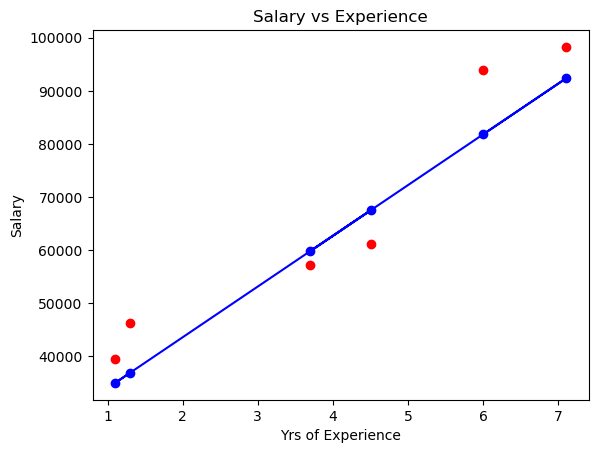

In [15]:
plt.scatter(x_test, y_test, color = 'red')
plt.scatter(x_test, predicted_salary, color = 'blue')
plt.plot(x_test, predicted_salary, color = 'blue')
plt.xlabel('Yrs of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show() 